In [2]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 26.3 MB/s 
     |████████████████████████████████| 18.0 MB 348 kB/s 
     |████████████████████████████████| 240 kB 54.4 MB/s 
     |████████████████████████████████| 200 kB 58.9 MB/s 
     |████████████████████████████████| 112 kB 59.8 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 1.6 MB 53.8 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 943 kB 40.1 MB/s 
     |████████████████████████████████| 37.5 MB 14 kB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 4.0 MB 65.7 MB/s 
     |████████████████████████████████| 112 kB 75.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.36.1-py3-none-any.whl size=11887 sha256=b3b71d0c28945a22fa886b3de67680e3ae894bc36769a3a6eb5cd4260187d1ab
  Stored in directory: /root/.cache/pip/whee

In [3]:
import numpy as np

zero_state=np.array(([1],[0]))
one_state=np.array(([0],[1]))
hadamaard_gate=np.array(([1,1],[1,-1]))/np.sqrt(2)
x_gate=np.array(([0,1],[1,0]))
z_gate=np.array(([1,0],[0,-1]))


In [4]:
zero_result=hadamaard_gate@zero_state# 0 durumuna hadamaard kapısı uygulayalım 

In [5]:
zero_result

array([[0.70710678],
       [0.70710678]])

In [6]:
zero_result=hadamaard_gate@zero_result #Superpozisyon durumuna girmiş qubite tekrar hadamaar kapısı uygulanırsa ilk haline gelir

In [7]:
zero_result

array([[1.],
       [0.]])

Yukarki işlemleri qiskit aracı ile gösterelim.

In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint

In [9]:
qc = QuantumCircuit(1,1) # 1 tabe kübit tanılanır
qc.h(0)
qc.barrier()
qc.h(0)
qc.measure(0,0)

In [10]:
display(qc.draw())

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

Ölçüm sonucu:

┌───┐ ░ ┌───┐┌─┐
  q: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

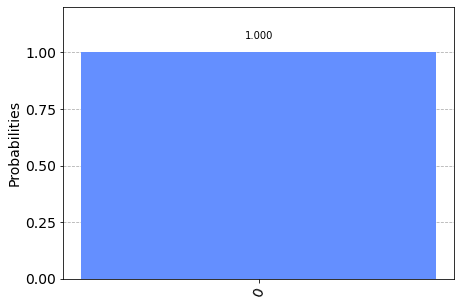

In [11]:
display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

Kuantum anahtar dağılımında bu yöntemin kullanımının amacı nedir? 
Yukarki örnekte devrenin sol kısmını Alice, sağ taradıfını Bob farz edelim. Alice kübitini süperpozisyon durumuna iken ölçüm yapıldığında kuantuma göre durum ya 1 yada 0 durumuna çökmesi gerekir. Yani tekrar Hadamaard kapısı uygulanmadan 3. kişi erişmek isterse(Eve olsun) alcağı sonucun doğru olma ihtimali yüzde 50 dir. Aşağıdaki Örnek bunu göstermektedir.

┌───┐┌─┐ ░ ┌───┐┌─┐
  q: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

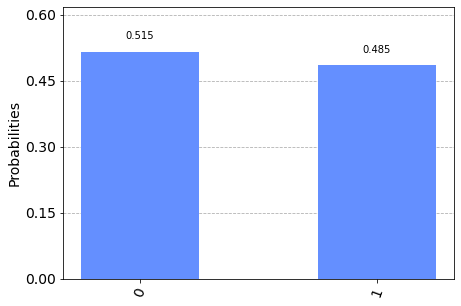

In [12]:
qc = QuantumCircuit(1,1)

qc.h(0)

qc.measure(0, 0)
qc.barrier()

qc.h(0)
qc.measure(0,0)

display(qc.draw())
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(assemble(qc))
plot_histogram(job.result().get_counts())

Dikkat ederseniz Alice'in kübiti süperpozisyona geçtikten sonra Eve bilgiyi ele geçirmek için ölçüm yapmak istemektedir. Ancak alacağı sonucun doğru olma ihtimali yüzde 50 dir. Devamki kodlarda pdf te anlatılan qunatum anahtar dağılımının yazılımsal işleyişini anlatmaktadır. 

Ön bilgi: 

1.   Bloch kürsinde |0> durumu +z ekseni
2.   Bloch kürsinde |1> durumu -z ekseni
3.   Bloch kürsinde |i> durumu +y ekseni
4.   Bloch kürsinde |-i> durumu -y ekseni
5.   Bloch kürsinde |+> durumu +x ekseni
6.   Bloch kürsinde |-> durumu -x ekseni

Kübite z tabanında işlem yapılabilmesi için x kapısı kullanılması gerekmektedir.
Kübite x tabanında işlem yapılabilmesi için önce süper poziyon durmuna sokuması gerekmektedir. Süper poziyon durumunda kübitin koordinat gösteriminde x tabanında bulunmaktadır.

In [13]:
z_basis=x_gate@zero_state

In [14]:
z_basis #Sonuc |1> olamalı  yani +z den -z ye geçiş olmalı

array([[0],
       [1]])

In [15]:
x_basis=hadamaard_gate@zero_state

In [16]:
x_basis #Sonuc |+> 'dır yani z ekseninden x eksenine geçiş olmuştur. Eğerki bu durumda x kapısı uygulanırsa vektör x ekseninde değişime uğrar

array([[0.70710678],
       [0.70710678]])

In [17]:
np.sqrt(zero_state.T@one_state)#0 ve 1 durumları ortogonal vektörlerdir

array([[0.]])

In [19]:
zero_state

array([[1],
       [0]])

In [23]:
np.square(zero_state.T@hadamaard_gate@zero_state)

array([[0.5]])

In [24]:
np.random.seed(seed=0)
n = 100
## Adım 1
# Alice bitleri türetilir
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [25]:
alice_bases = randint(2, size=n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [26]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [31]:
message=encode_message(alice_bits,alice_bases)
print(message[0])

     ┌───┐ ░ 
  q: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════
             


In [33]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [34]:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

In [35]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [36]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
alice_sample = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
